Fertility Rates
===

2017-07-27

> [UN Fertility Rates Data](http://data.un.org/Data.aspx?q=fertility+rate)

An example from the book - The Functional Art

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')

df = pd.read_table('Fertility-Rates.txt', sep=';')

In [2]:
df.head()

,Country or Area,1960,1960 Footnotes,1961,1961 Footnotes,1962,1962 Footnotes,1963,1963 Footnotes,1964,...,2010,2010 Footnotes,2011,2011 Footnotes,2012,2012 Footnotes,2013,2013 Footnotes,2014,2014 Footnotes
0,Afghanistan,7.45,NaN,7.450,NaN,7.450,NaN,7.450,NaN,7.450,...,5.746,NaN,5.506,NaN,5.272,NaN,5.050,NaN,4.843,NaN
1,Albania,6.489,NaN,6.401,NaN,6.282,NaN,6.133,NaN,5.960,...,1.663,NaN,1.699,NaN,1.735,NaN,1.765,NaN,1.784,NaN
2,Algeria,7.524,NaN,7.573,NaN,7.614,NaN,7.646,NaN,7.665,...,2.873,NaN,2.903,NaN,2.909,NaN,2.893,NaN,2.857,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,7.379,NaN,7.388,NaN,7.396,NaN,7.402,NaN,7.406,...,6.416,NaN,6.335,NaN,6.251,NaN,6.165,NaN,6.080,NaN


In [3]:
# remove footnotes
# find cols with footnotes
buzz = 'Footnotes'
col_footnotes = []

for col in df.columns:
    if buzz in col:
        col_footnotes.append(col)
        
df = df.drop(col_footnotes, axis=1)

In [4]:
# Set index
df = df.set_index('Country or Area')

In [5]:
# Find NAs
df = df[df.isnull().sum(axis=1) == 0]

In [7]:
len(df.isnull().sum(axis=1))

212

In [8]:
df = df.T

In [9]:
df = df.astype(float)

In [10]:
df.head()

Country or Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),World,"Yemen, Rep.",Zambia,Zimbabwe
1960,7.45,6.489,7.524,7.379,4.425,6.924376,3.109,4.550,4.820,3.453,...,2.880,6.707,7.197,6.616,6.348,5.615,4.984412,7.380,7.018,7.158
1961,7.45,6.401,7.573,7.388,4.386,6.946426,3.100,4.512,4.655,3.540,...,2.886,6.755,7.120,6.637,6.392,5.651,5.008186,7.405,7.071,7.215
1962,7.45,6.282,7.614,7.396,4.344,6.964454,3.089,4.435,4.471,3.442,...,2.884,6.783,7.033,6.628,6.425,5.679,5.030386,7.437,7.127,7.267
1963,7.45,6.133,7.646,7.402,4.299,6.975892,3.078,4.317,4.271,3.332,...,2.874,6.790,6.938,6.581,6.448,5.696,5.050741,7.475,7.184,7.311
1964,7.45,5.960,7.665,7.406,4.250,6.978893,3.068,4.161,4.059,3.146,...,2.858,6.777,6.836,6.495,6.464,5.698,5.061242,7.519,7.240,7.347


In [15]:
df.to_csv('Fertility-Rates-processed.csv')

In [23]:
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'World', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country or Area', length=212)

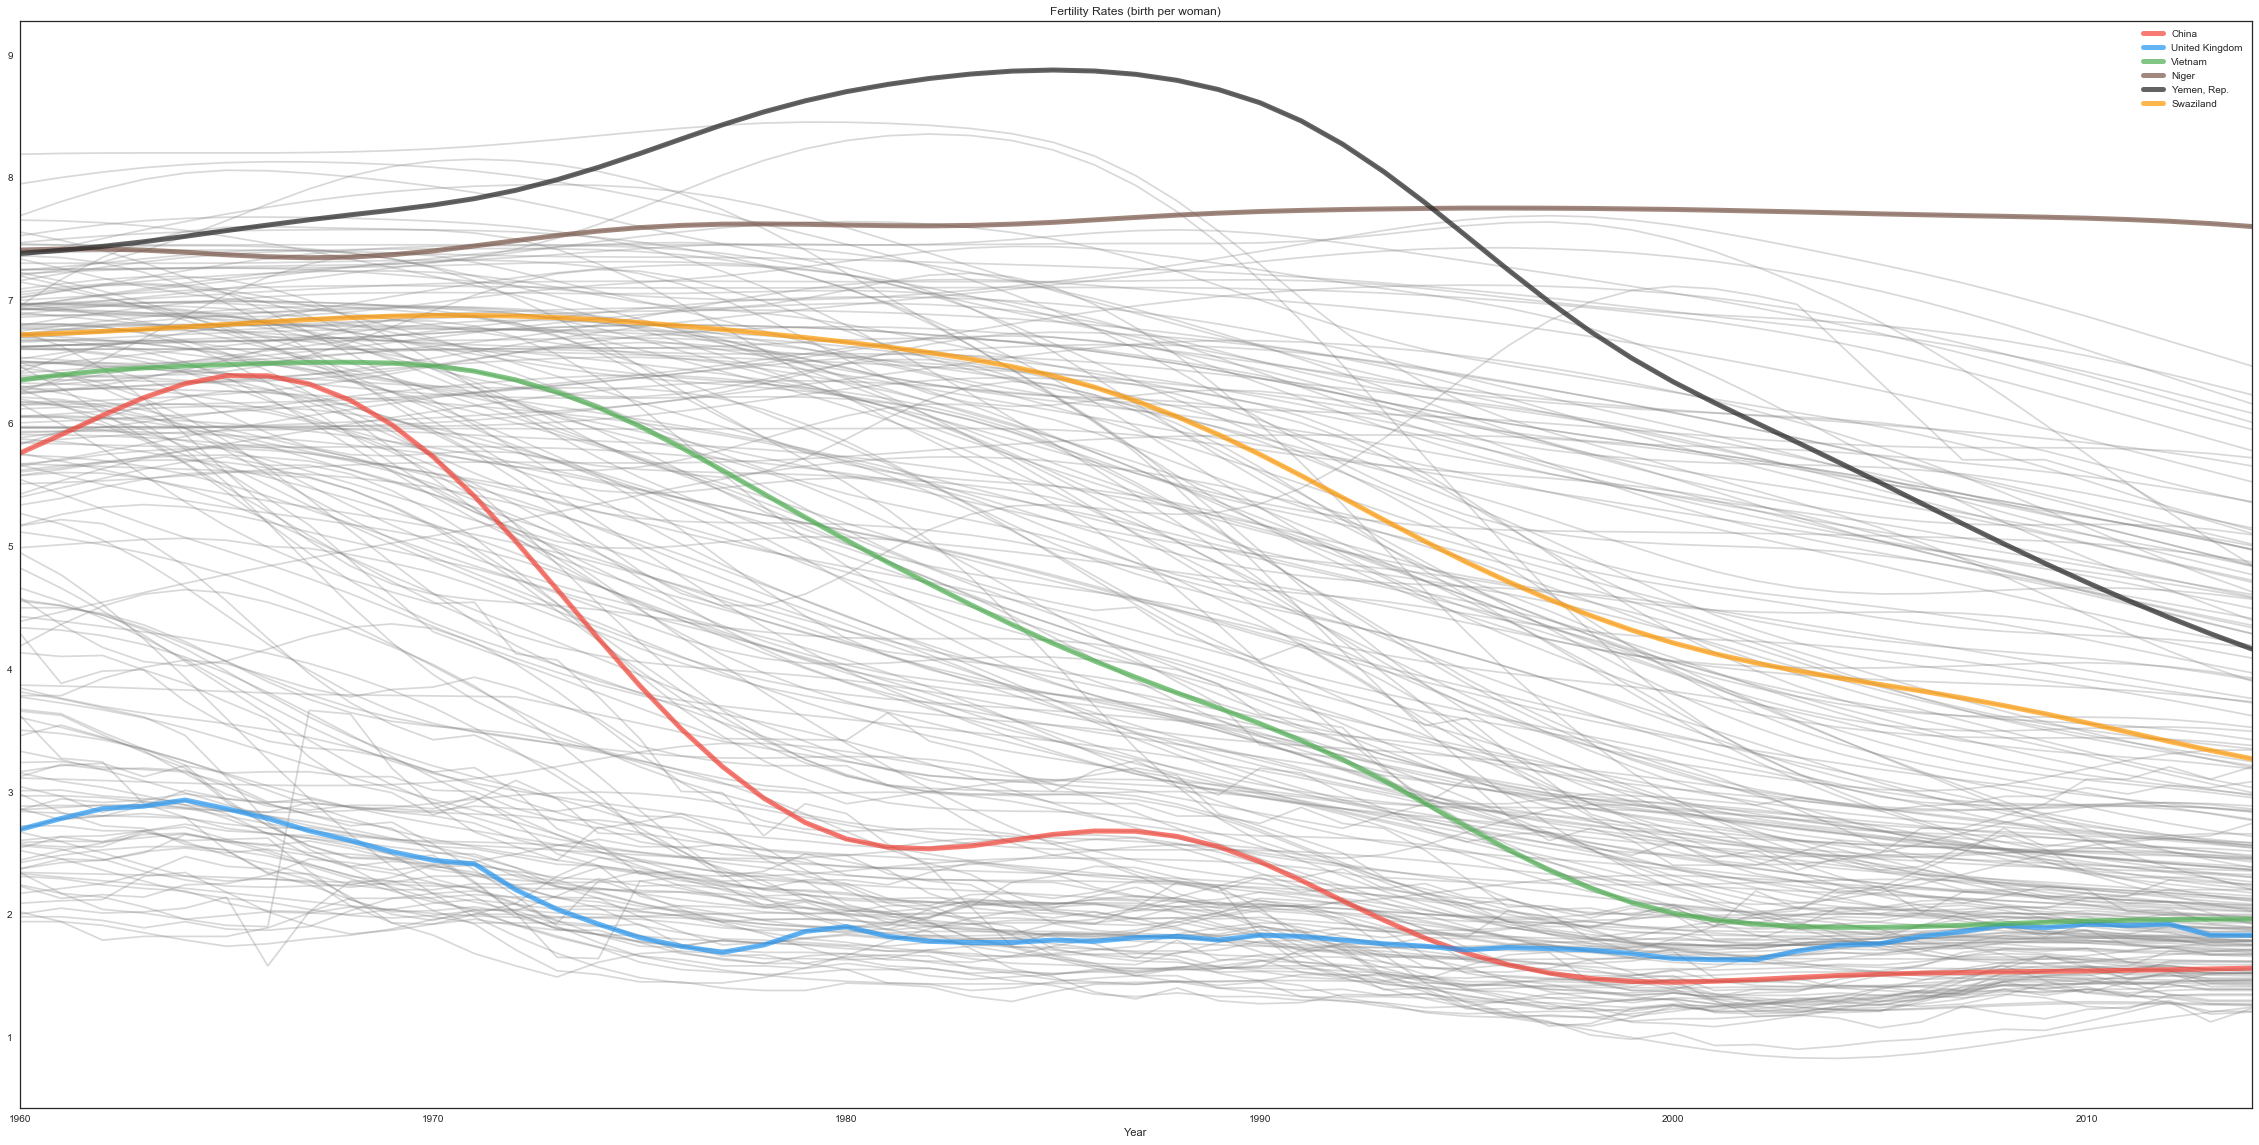

In [28]:
# plt.figure(dpi=300)
df.plot(legend=False, alpha=0.3, figsize=(40, 20), color='grey', ax=plt.gca())
linewidth = 5
df['China'].plot(linewidth=linewidth, color='#f44336', legend=True, alpha=0.7)
df['United Kingdom'].plot(linewidth=linewidth, color='#2196F3', legend=True, alpha=0.7)
df['Vietnam'].plot(linewidth=linewidth, color='#4CAF50', legend=True, alpha=0.7)
df['Niger'].plot(linewidth=linewidth, color='#795548', legend=True, alpha=0.7)
df['Yemen, Rep.'].plot(linewidth=linewidth, color='#212121', legend=True, alpha=0.7)
df['India'].plot(linewidth=linewidth, color='#FF9800', legend=True, alpha=0.7)
plt.xlabel('Year')
plt.title('Fertility Rates (birth per woman)')